# Import Cells

In [1]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, scipy, sklearn
import seaborn as sns  # Seaborn, used for graphing 

# Data Loading and Pre-Processing

In [2]:
# load data into dataframe using Pandas
train_data = pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Drop the ticket, name, id columns - not relevant to final predictions
train_data = train_data.drop(['Ticket', 'Name', 'PassengerId'], axis=1)

# Encode the gender values to either 0 (male) or 1 (female)
train_data['Sex'] = train_data['Sex'].replace(['female', 'male'], [1, 0])

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


In [4]:
# Get basic statistical data about the data set
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Split the data into positive/negative classes (survived vs not survived)
positive = train_data[train_data['Survived'] == 1]
negative = train_data[train_data['Survived'] != 1]

Text(0.5, 1.0, 'Ratio of Survivors (1) vs Deaths (0) in Data')

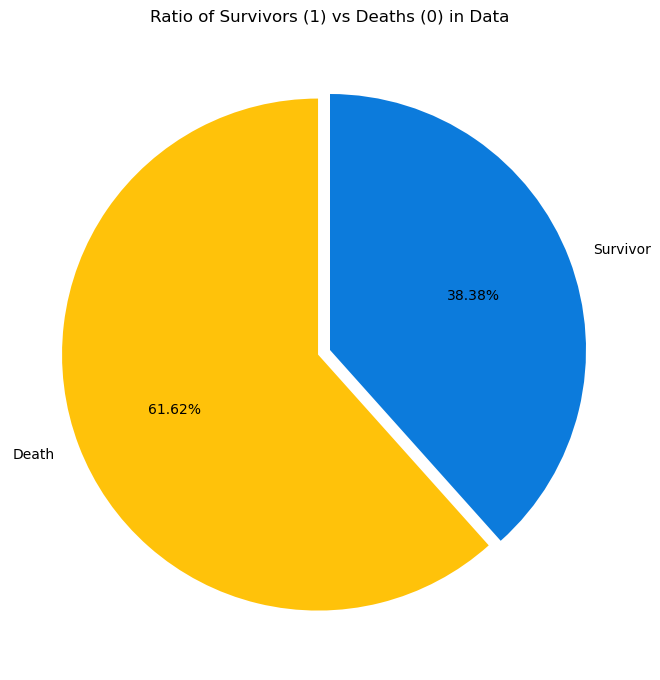

In [6]:
# Create a pie chart showing the disparity between positive (survived) and negative (died) classes
total_cases = train_data['Survived'].size
pos_cases = positive.size
neg_cases = negative.size

pos_ratio = pos_cases/total_cases
neg_ratio = neg_cases/total_cases

chart_sizes = [neg_ratio, pos_ratio]

# Try to choose colors that are accessable to all. Link below explains.
# https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40
pie_colors = ['#FFC20A', '#0C7BDC']

# Set size of chart
pie_chart = plt.figure(figsize = (8,8))
pie_chart = pie_chart.add_axes([0.1, 0.1, 0.8, 0.8])

labels = ['Death', 'Survivor'] # Pie Chart labels for the classes 
explode = (0.05, 0) # Makes one of the wedges of the chart "stand out"


pies = pie_chart.pie(chart_sizes, explode = explode, labels = labels, colors = pie_colors, autopct = '%1.2f%%', 
                     shadow=False, startangle = 90)

# Add title to chart
plt.title('Ratio of Survivors (1) vs Deaths (0) in Data')

In [7]:
# Lets do some analysis of women vs men survival rates
women_data = train_data[train_data['Sex'] == 1]
men_data = train_data[train_data['Sex'] == 0]

data_list = [women_data, men_data]

In [8]:
# Let's see the average of men vs women survival rates
# Closer to 1 means that, on average, a group tended to survive more
avg_list = []

for df in data_list:
    avg_list.append(df['Survived'].mean())
    
res_dict = {'women': avg_list[0], 
             'men': avg_list[1]}

Text(0.5, 1.0, 'Survival Rates of the Titanic with relation to Sex')

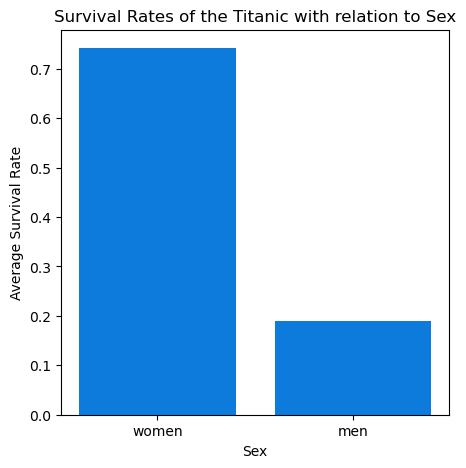

In [9]:
# Make a bar chart that shows the results of the basic analysis
x_axis = list(res_dict.keys())
y_axis = list(res_dict.values())

fig = plt.figure(figsize = (5,5))

plt.bar(x_axis, y_axis, color='#0C7BDC')
plt.xlabel('Sex')
plt.ylabel('Average Survival Rate')
plt.title('Survival Rates of the Titanic with relation to Sex')

Number of Women: 314
Number of Men: 577


Text(0.5, 1.0, 'Ratio of Women vs Men in the Data')

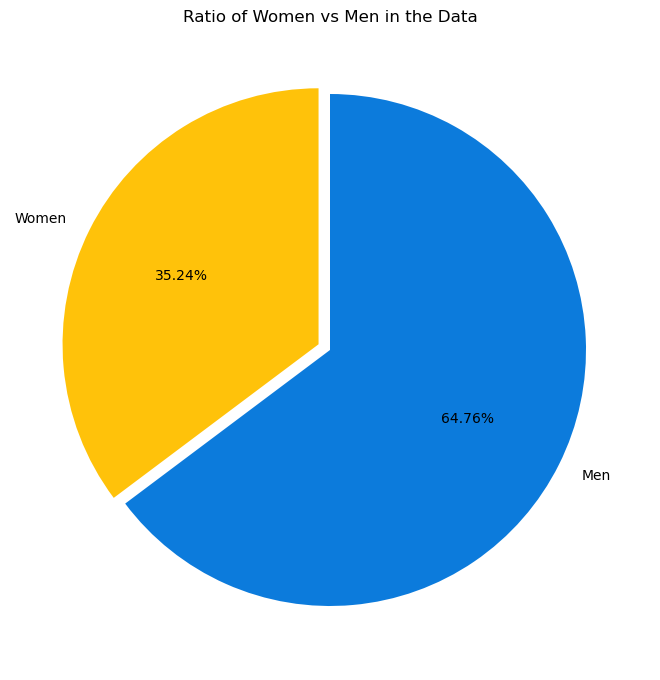

In [10]:
# Women tended to survive much more often than men. Let's get a visual breakdown of men vs women in the training data.
num_women = len(women_data['Sex'])
num_men = len(men_data['Sex'])

# Double check that the chart is properly labelled
print('Number of Women: ' + str(len(women_data['Sex'])))
print('Number of Men: ' + str(len(men_data['Sex'])))

women_ratio = num_women/total_cases
men_ratio = num_men/total_cases

chart_sizes = [women_ratio, men_ratio]

# Try to choose colors that are accessable to all. Link below explains.
# https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40
pie_colors = ['#FFC20A', '#0C7BDC']

# Set size of chart
pie_chart_sex = plt.figure(figsize = (8,8))
pie_chart_sex = pie_chart_sex.add_axes([0.1, 0.1, 0.8, 0.8])

labels = ['Women', 'Men'] # Pie Chart labels for the classes 
explode = (0.05, 0) # Makes one of the wedges of the chart "stand out"


pies = pie_chart_sex.pie(chart_sizes, explode = explode, labels = labels, colors = pie_colors, autopct = '%1.2f%%', 
                     shadow=False, startangle = 90)

# Add title to chart
plt.title('Ratio of Women vs Men in the Data')

In [11]:
# Check and see which columns contain empty or null values
positive.isna().sum()

Survived      0
Pclass        0
Sex           0
Age          52
SibSp         0
Parch         0
Fare          0
Cabin       206
Embarked      2
dtype: int64

In [12]:
negative.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         125
SibSp         0
Parch         0
Fare          0
Cabin       481
Embarked      0
dtype: int64

In [13]:
# As it turns out, most of the data belonging to what cabin people were in is not provided. Drop the column.
# ~77% of the data does not contain data for the field. Cannot be deemed relevant in this case. 
no_cabin = negative.isna().sum()['Cabin'] + positive.isna().sum()['Cabin']
no_cabin_ratio = no_cabin/total_cases
print('Percent of cases missing Cabin data: {}%'.format(round(no_cabin_ratio, 5)))

train_data = train_data.drop(['Cabin'], axis=1)
train_data = train_data.drop(['Embarked'], axis=1)

Percent of cases missing Cabin data: 0.77104%


# Imputation of Missing Values

In [14]:
# Attempt to estimate the missing ages by using correlated data to predict
# First do basic correlation analysis to see what may be relevant in prediction
corr = train_data.corr(method='pearson', numeric_only=True)
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

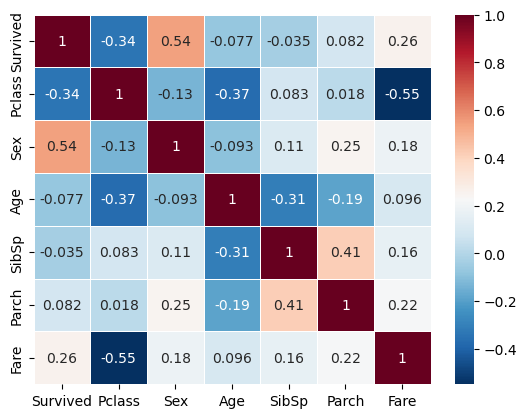

In [15]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5)

In [17]:
# We are trying to predict Age using imputation via regression.
# There are quite a few negative correlations with respect to Age.
# Create a new DF that only has cases that aren't missing age.

# First, extract the data that has all columns filled in with data and use only the relevant columns
# Bug found - the 2 missing values are dropped here because 'Embarked' is N/A for them
age_pred_df = train_data.dropna(axis=0)
age_pred_df = age_pred_df.drop(['Survived'], axis=1)
age_pred_df
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,NaN,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [19]:
# Next, extract the rows from the original data that do not have values for Age
# These will be used for prediction later on
no_age_pred_df = train_data[train_data['Age'].isna()]
no_age_pred_df = no_age_pred_df.drop(['Survived', 'Age'], axis=1)
no_age_pred_df

,Pclass,Sex,SibSp,Parch,Fare
5,3,0,0,0,8.4583
17,2,0,0,0,13.0000
19,3,1,0,0,7.2250
26,3,0,0,0,7.2250
28,3,1,0,0,7.8792
...,...,...,...,...,...
859,3,0,0,0,7.2292
863,3,1,8,2,69.5500
868,3,0,0,0,9.5000
878,3,0,0,0,7.8958


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create train/test split using the intact data
X_age = age_pred_df.drop(['Age'], axis=1)
Y_age = age_pred_df['Age']

X_train_age, X_test_age, Y_train_age, Y_test_age = train_test_split(X_age, Y_age, test_size=0.25, random_state=42) 

In [21]:
# Train the model and obtain the prediction results
age_model = LinearRegression().fit(X_train_age, Y_train_age)

age_preds = age_model.predict(no_age_pred_df)

In [22]:
# Now that we have the list of age predictions we can popoulate the missing values
no_age_pred_df['Age'] = age_preds

# As a last resort, change any negative values to the average age
no_age_pred_df.loc[no_age_pred_df['Age'] < 0] = 29
no_age_pred_df

,Pclass,Sex,SibSp,Parch,Fare,Age
5,3,0,0,0,8.4583,28.588366
17,2,0,0,0,13.0000,35.875221
19,3,1,0,0,7.2250,24.331062
26,3,0,0,0,7.2250,28.612509
28,3,1,0,0,7.8792,24.318255
...,...,...,...,...,...,...
859,3,0,0,0,7.2292,28.612427
863,29,29,29,29,29.0000,29.000000
868,3,0,0,0,9.5000,28.567974
878,3,0,0,0,7.8958,28.599377


In [23]:
# Combine the datasets into one
# First re-order the data so 
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
no_age_pred_df = no_age_pred_df[cols]
combined_data = pd.concat([no_age_pred_df, age_pred_df])
combined_data

,Pclass,Sex,Age,SibSp,Parch,Fare
5,3,0,28.588366,0,0,8.4583
17,2,0,35.875221,0,0,13.0000
19,3,1,24.331062,0,0,7.2250
26,3,0,28.612509,0,0,7.2250
28,3,1,24.318255,0,0,7.8792
...,...,...,...,...,...,...
885,3,1,39.000000,0,5,29.1250
886,2,0,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
889,1,0,26.000000,0,0,30.0000


# Modelling 